In [118]:
import pandas as pd
import matplotlib
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import os

from os import listdir # Библиотека для получения списка файлов
from os.path import isfile, join
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'


В этом упражнении вам предлагается построить классификатор на наборе данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases). Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.

Набор данных состоит из таких предикторов, как количество беременностей у пациентки, индекс массы тела, уровень инсулина, возраст и так далее. Отклик принимает два значение — больна (1) диабетом или нет (0).
1. Скачайте исходный набор данных и отделите от него первые 520 строк. Введите число строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).
2. Разделите полученную выборку на тренировочную и тестовую части, в отношении 80/20 (первые 80% строк — тренировочный набор данных, остальные 20% — тестовый). Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.
3. Обучите классификатор используя DecisionTreeClassifier с параметрами criterion='entropy', max_leaf_nodes = 25, min_samples_leaf = 15 и random_state = 2020.
4. Изучите получившееся дерево принятия решений.Введите глубину дерева:
По какому предиктору выполнено разделение на последнем уровне дерева принятия решений (если таких узлов несколько, введите название любого из них):
Введите значение разделения для указанного предиктора с точностью до сотых:
5. Оцените модель с помощью тестовых данных. Введите долю правильных ответов:
6.Введите среднее значение метрик  (Macro-F1):
7.Выполните предсказание для пациентов 719, 739, 748, 734 (указаны номера строк, нумерация с нуля) из начального набора данных.

In [119]:
#чтение данных, _______________, используем их в качестве индекса

df = pd.read_csv("/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/IZ_33_diabets/diabetes.csv", delimiter=',') # , index_col='competitorname'


In [120]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [122]:
df_1 = df.head(520)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               520 non-null    int64  
 1   Glucose                   520 non-null    int64  
 2   BloodPressure             520 non-null    int64  
 3   SkinThickness             520 non-null    int64  
 4   Insulin                   520 non-null    int64  
 5   BMI                       520 non-null    float64
 6   DiabetesPedigreeFunction  520 non-null    float64
 7   Age                       520 non-null    int64  
 8   Outcome                   520 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 36.7 KB


In [123]:
df_1['Outcome'].value_counts()

0    333
1    187
Name: Outcome, dtype: int64

In [124]:
features = list(df_1.columns[:8])

In [125]:
train = df_1.head(int(len(df_1)*0.8))
test = df_1.tail(int(len(df_1)*0.2))


In [126]:
x = train[features]
y = train['Outcome']  

In [127]:
tree = DecisionTreeClassifier(criterion='entropy', 
                            max_leaf_nodes = 25, 
                            min_samples_leaf = 15, random_state = 2020)
            

In [128]:

clf=tree.fit(x, y)

In [129]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [130]:
clf.tree_.max_depth

8

In [131]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

In [132]:

accuracy_score(y_true, y_pred)

0.8173076923076923

In [133]:

from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.759464394400487

In [134]:
df.loc[719, features]

Pregnancies                  5.000
Glucose                     97.000
BloodPressure               76.000
SkinThickness               27.000
Insulin                      0.000
BMI                         35.600
DiabetesPedigreeFunction     0.378
Age                         52.000
Name: 719, dtype: float64

In [135]:
clf.predict([df.loc[719, features].tolist()])[0]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [136]:
df.loc[739, features]

Pregnancies                   1.000
Glucose                     102.000
BloodPressure                74.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          39.500
DiabetesPedigreeFunction      0.293
Age                          42.000
Name: 739, dtype: float64

In [137]:
clf.predict([df.loc[739, features].tolist()])[0]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [138]:
df.loc[748, features]

Pregnancies                   3.000
Glucose                     187.000
BloodPressure                70.000
SkinThickness                22.000
Insulin                     200.000
BMI                          36.400
DiabetesPedigreeFunction      0.408
Age                          36.000
Name: 748, dtype: float64

In [139]:
clf.predict([df.loc[748, features].tolist()])[0]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [140]:
df.loc[734, features]

Pregnancies                   2.00
Glucose                     105.00
BloodPressure                75.00
SkinThickness                 0.00
Insulin                       0.00
BMI                          23.30
DiabetesPedigreeFunction      0.56
Age                          53.00
Name: 734, dtype: float64

In [141]:
clf.predict([df.loc[734, features].tolist()])[0]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

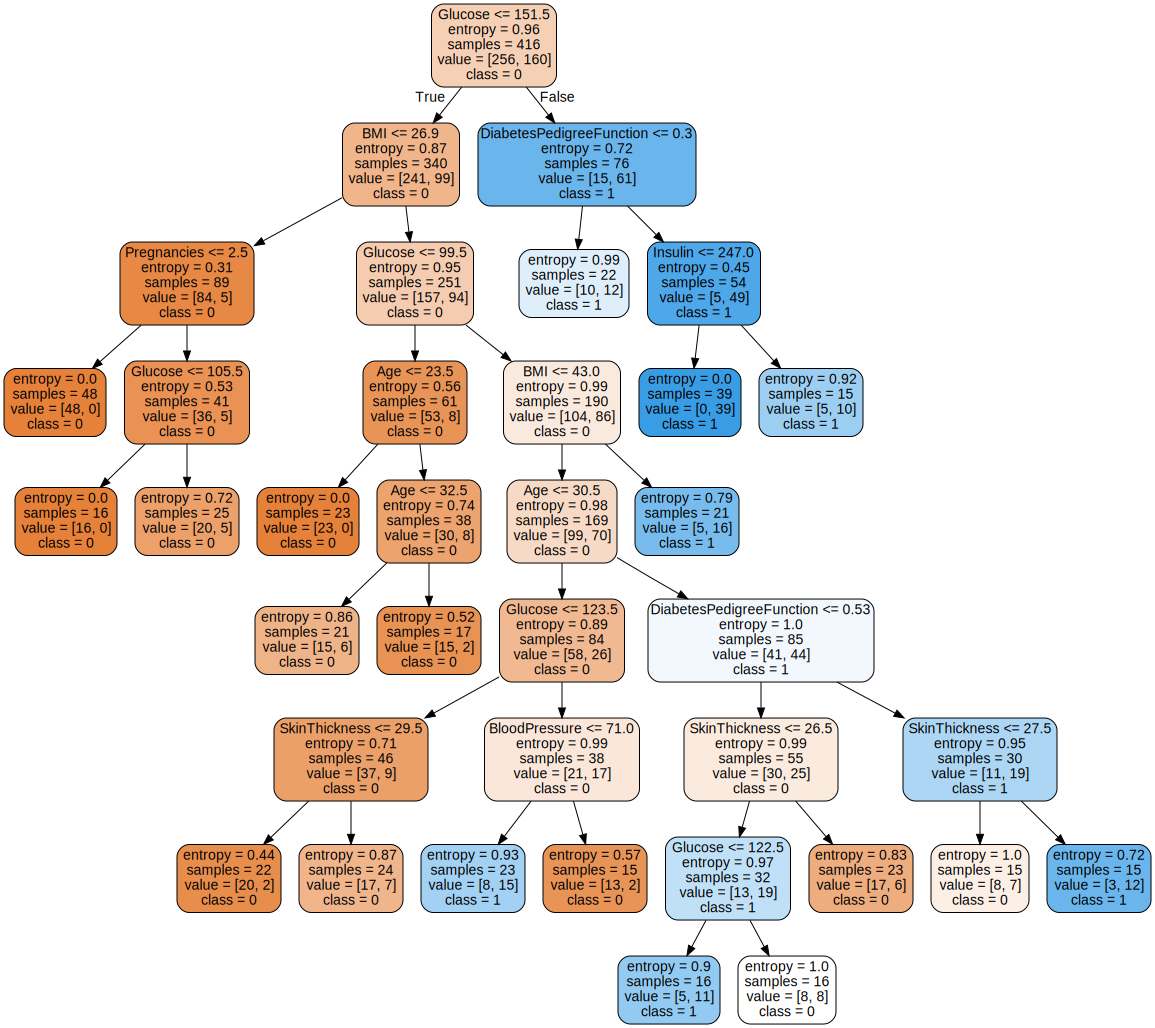

In [142]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)